## MNIST Classification

In [78]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [79]:
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()
#A DESCR key describing the dataset
#A data key containing an array with one row per instance and one column per feature
#A target key containing an array with the labels

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
X,y=mnist["data"],mnist["target"]
X.shape
#70,000 images and each image has 784 features
#each image is 28x28 and each feature simply represents one pixle's intensity, ranging from (0,255):(white:black)
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [5]:
y.shape

(70000,)

In [6]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#to look at one digit/image, all you need to do is grab and instance's feature vector
#reshape the image to a 28x28 array and display in matplotlib imshow()
some_digit=X.iloc[0]
some_digit_n=some_digit.to_numpy()
some_digit_image=some_digit_n.reshape(28,28)

<function matplotlib.pyplot.show(close=None, block=None)>

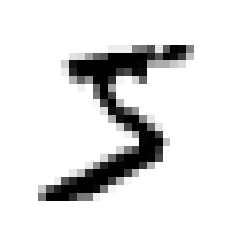

In [8]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show

In [9]:
y[0]

'5'

In [10]:
#since the target is a string, we cast the target into an int
y=y.astype(np.uint8)

In [11]:
X_train,X_test,y_train,y_test=X.iloc[:60000],X.iloc[60000:],y.iloc[:60000],y.iloc[60000:]

In [12]:
#training a binary classifier, creating target vectors for the classification task
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [13]:
#we now use a classifier and train it, we choose stochastic gradient descent from sklearns
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
sgd_clf.predict([some_digit])

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### The classifier guesses the image is '5', and it guesses correct

In [14]:
#Measuring Accuracy using cross-validation
skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

KeyError: "None of [Int64Index([    1,     3,     4,     5,     7,     8,    10,    11,    12,\n               13,\n            ...\n            59984, 59985, 59987, 59988, 59989, 59991, 59993, 59994, 59996,\n            59998],\n           dtype='int64', length=40000)] are in the [columns]"

In [15]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### a classifier that just classifies every single image in the "not-5" class

In [16]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [17]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")
##only a 10% of the images are '5's

array([0.91125, 0.90855, 0.90915])

In [18]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
##cross_val_predict() performs K-fold cross-validation

In [19]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [20]:
#Confusion matrix to get information about the classifier, for a perfect classifier, there'd be ones in it's main diagonal
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [21]:
#precision of the classifier, a more consise metric than the confusion matrix where it takes the accuracy of the true positives of the classifier
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [22]:
#recall: ratio of positive instances that are correctly detected by the classifier
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [23]:
##F_1 score: harmonic mean of precision and recall, giving more value to low values, if both Precision and Recall are high, F_1 score will get high
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [24]:
## descion_function to see precision/recall tradeoff
y_scores=sgd_clf.decision_function([some_digit])
y_scores

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [25]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [26]:
##since the threshold is zero, it yeilds the same result as predict() function
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [27]:
##finding threshold using cross_val_predict function and specifying the method='decision_function'
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [28]:
##getting the values for precision, recalls,thresholds
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [29]:
##making a function to plot precision and recall as functions of threshold
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    #plt.plot(thresholds,"r--",label="threshold")
    plt.grid()
    plt.legend()

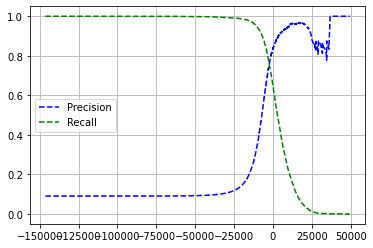

In [30]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [31]:
##plotting precision directly againts recalls
def plot_precision_vs_recall(precisions,recalls):    
    plt.plot(precisions[:-1],recalls[:-1],"b--",label="Precisions/Recalls")
    plt.grid()
    plt.legend

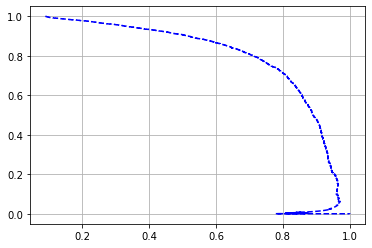

In [32]:
plot_precision_vs_recall(precisions,recalls)

In [33]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]
y_train_pred_90=(y_scores>=threshold_90_precision)
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [34]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [35]:
##ROC_curve metrics
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [36]:
##Function to plot ROC_curve
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.grid()
    plt.legend()

No handles with labels found to put in legend.


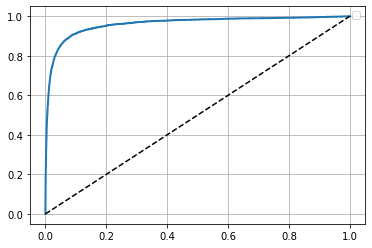

In [37]:
plot_roc_curves(fpr,tpr)
plt.show()

In [38]:
##to compare different classifiers, the area under their ROC curve is measured. A perfect classifier shall have ann area under the curve equal to 1
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [39]:
##we shall train a random forest classifier to know the AUC of it's ROC
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [40]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

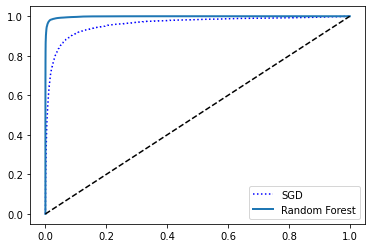

In [41]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curves(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [42]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

### Multiclass classification: detecting more than 1 number

In [43]:
##Support vector classifier
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [44]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [45]:
np.argmax(some_digit_scores)

5

In [46]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [47]:
svm_clf.classes_[5]

5

In [48]:
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [49]:
ovr_clf.predict([some_digit])

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

array([5], dtype=uint8)

In [50]:
len(ovr_clf.estimators_)

10

In [51]:
##training an SGDClassifier
sgd_clf.decision_function([some_digit])

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [52]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [55]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

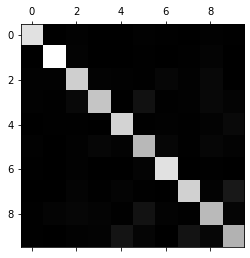

In [56]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show

In [57]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

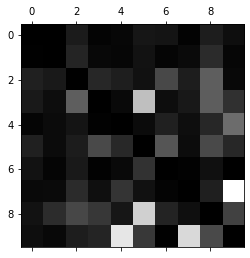

In [59]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [62]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

In [74]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    instances=instances.to_numpy()
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

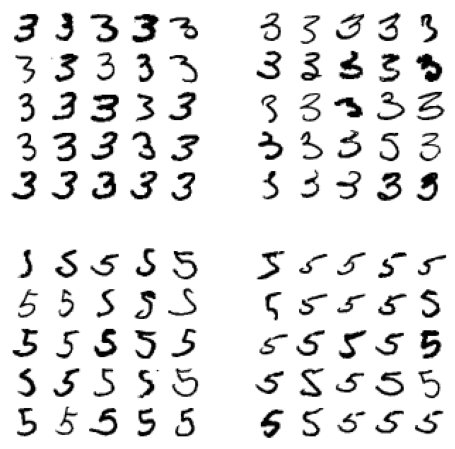

In [75]:
plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25],images_per_row=5)
plt.show()

In [80]:
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

### K Neighbor Classifier

In [82]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [83]:
knn_clf.predict([some_digit])

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [84]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.976410265560605

In [85]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

In [91]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier()

In [97]:
X_test_mod=X_test_mod.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [100]:
np.shape(X_test_mod)

(10000, 784)

In [101]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[0,0]])
plot_digit(clean_digit)

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[38.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.